Locally weighted regression

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
x = np.linspace(-5,5,1000)
y = np.log(np.abs((x ** 2) -1 )+0.5)

x += np.random.normal(scale=0.5,size=1000)


In [32]:
def kernel(x0,x,tau):
    return np.exp(np.sum((x-x0)*2,axis=1)/(-2*tau*2))


In [36]:
def local_regression(x0, x, y, tau):
    x0 = np.r_[1, x0]
    x = np.c_[np.ones(len(x)), x]
    xw = x.T * kernel(x0, x, tau)
    beta = np.linalg.pinv(xw @ x) @ xw @ y
    return x0 @ beta

In [50]:
def plot_lr(tau):
    domain = np.linspace(-5, 5, 1000)
    prediction = [local_regression(x0, x, y, tau) for x0 in domain]
    plt.scatter(x, y, alpha = 0.3)
    plt.plot(domain, prediction, color = 'blue')
    return plt
    

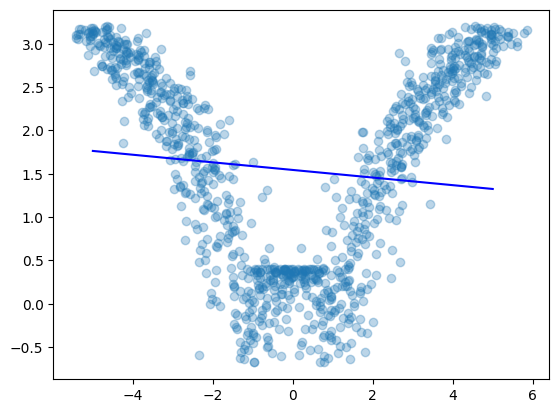

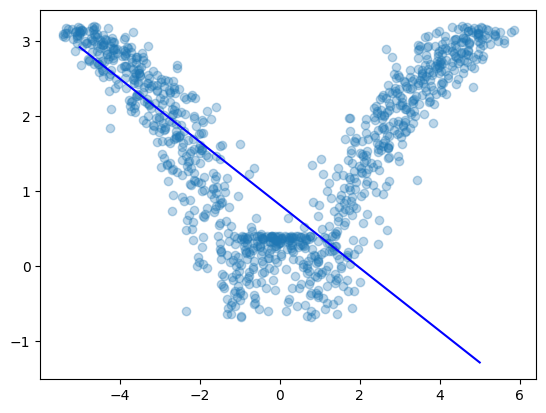

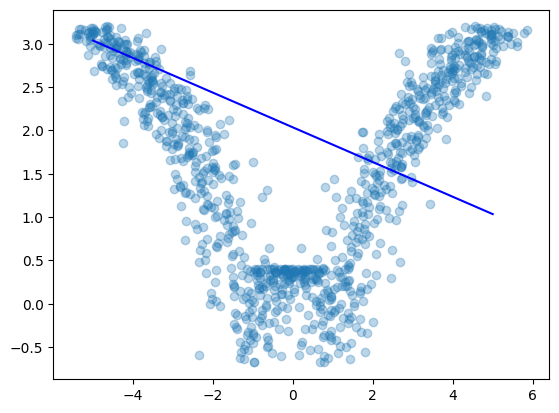

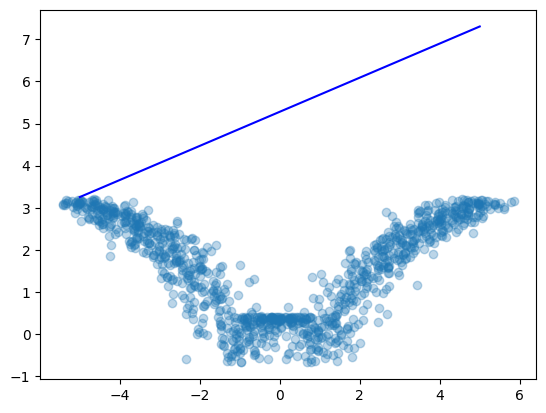

In [51]:
plot_lr(10).show()
plot_lr(1).show()
plot_lr(0.1).show()
plot_lr(0.01).show()

